In [1]:
import pm4py

In [2]:
log = pm4py.read_xes(r'...datasets\second_group_of_synthetic_logs\1167521718_noisy.xes')
df = pm4py.convert_to_dataframe(log)
df

,concept:name,time:timestamp,ID
0,check mail by charlse,1970-04-26 18:46:41+00:00,0
1,archive letter and infor mation,1970-04-26 18:46:43+00:00,0
2,take letters and register to secretary,1970-04-26 18:46:44+00:00,0
3,receive letter,1970-04-26 18:46:45+00:00,0
4,write letter with reason of rejection,1970-04-26 18:46:47+00:00,0
...,...,...,...
6253,make phone call to sender and complete info,1970-04-26 18:46:50+00:00,999
6254,archive letter and infor mation,1970-04-26 18:46:51+00:00,999
6255,take letters and register to secretary,1970-04-26 18:46:52+00:00,999
6256,receive letter,1970-04-26 18:46:53+00:00,999


In [3]:
# print out the head of the event log
df.head()

,concept:name,time:timestamp,ID
0,check mail by charlse,1970-04-26 18:46:41+00:00,0
1,archive letter and infor mation,1970-04-26 18:46:43+00:00,0
2,take letters and register to secretary,1970-04-26 18:46:44+00:00,0
3,receive letter,1970-04-26 18:46:45+00:00,0
4,write letter with reason of rejection,1970-04-26 18:46:47+00:00,0


In [4]:
import numpy as np
unique_cases = np.unique(df['ID'])
len(unique_cases)

1000

In [5]:
# extract the activities
activities = df['concept:name']
activities

0                            check  mail by  charlse
1                  archive  letter and  infor mation
2             take letters and register to secretary
3                                     receive letter
4              write letter with reason of rejection
                            ...                     
6253    make phone call to sender and complete  info
6254               archive  letter and  infor mation
6255          take letters and register to secretary
6256                                  receive letter
6257           write letter with reason of rejection
Name: concept:name, Length: 6258, dtype: object

In [6]:
# combine the rows by case number 
df1 =df.groupby('ID', as_index=False).agg(lambda x: x.tolist())
df1

,ID,concept:name,time:timestamp
0,0,"[check mail by charlse, archive letter and ...","[1970-04-26 18:46:41+00:00, 1970-04-26 18:46:4..."
1,1,"[check mail by charlse, make phone call to s...","[1970-04-26 18:46:48+00:00, 1970-04-26 18:46:5..."
2,2,"[check mail by charlse, archive letter and ...","[1970-04-26 18:46:41+00:00, 1970-04-26 18:46:4..."
3,3,"[check mail by charlse, make phone call to s...","[1970-04-26 18:46:48+00:00, 1970-04-26 18:46:5..."
4,4,"[check mail by charlse, archive letter and ...","[1970-04-26 18:46:41+00:00, 1970-04-26 18:46:4..."
...,...,...,...
995,995,"[check mail by charlse, make phone call to s...","[1970-04-26 18:46:48+00:00, 1970-04-26 18:46:5..."
996,996,"[check mail by charlse, archive letter and ...","[1970-04-26 18:46:41+00:00, 1970-04-26 18:46:4..."
997,997,"[write letter with reason of rejection, check ...","[NaT, 1970-04-26 18:46:48+00:00, 1970-04-26 18..."
998,998,"[check mail by charlse, archive letter and ...","[1970-04-26 18:46:41+00:00, 1970-04-26 18:46:4..."


In [7]:
import re
# extract the traces
activities = df1['concept:name']
# convert all traces and case status into a string
activities = df1["concept:name"].astype(str)
activities

0      ['check  mail by  charlse', 'archive  letter a...
1      ['check  mail by  charlse', 'make phone call t...
2      ['check  mail by  charlse', 'archive  letter a...
3      ['check  mail by  charlse', 'make phone call t...
4      ['check  mail by  charlse', 'archive  letter a...
                             ...                        
995    ['check  mail by  charlse', 'make phone call t...
996    ['check  mail by  charlse', 'archive  letter a...
997    ['write letter with reason of rejection', 'che...
998    ['check  mail by  charlse', 'archive  letter a...
999    ['check  mail by  charlse', 'make phone call t...
Name: concept:name, Length: 1000, dtype: object

In [8]:
activities[0]

"['check  mail by  charlse', 'archive  letter and  infor mation', 'take letters and register to secretary', 'receive letter', 'write letter with reason of rejection']"

In [9]:
len(activities)

1000

In [10]:
#Cleaning the text
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(len(activities)):
    pre = re.sub('[^a-zA-Z]', ' ', activities[i])
    pre = pre.lower()
    pre = pre.split()
    pre = [ps.stem(word) for word in pre if not word in set(stopwords.words('english'))]
    pre = ' '.join(pre)
    corpus.append(pre)

In [11]:
len(corpus)

1000

In [12]:
corpus[0]

'check mail charls archiv letter infor mation take letter regist secretari receiv letter write letter reason reject'

In [13]:
import nltk 
from nltk.tokenize import sent_tokenize, word_tokenize
words = nltk.word_tokenize(corpus[0])
words

['check',
 'mail',
 'charls',
 'archiv',
 'letter',
 'infor',
 'mation',
 'take',
 'letter',
 'regist',
 'secretari',
 'receiv',
 'letter',
 'write',
 'letter',
 'reason',
 'reject']

In [14]:
vocab = []
for i in range(len(corpus)):
    all_words = nltk.word_tokenize(corpus[i])
    vocab.append(all_words)
    print(all_words)

['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject', 'make', 'phone', 'call', 'sender', 'complet', 'info']
['c

['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', '

['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'archiv', 'letter', 'infor', 'mation', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'make', 'p

['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'archiv', 'letter', 'infor', 'mation', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'check', 'mail', 'charls', 'take', 'letter', 'regist', 'secretari', 'check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'take', 'letter', 'regist', 'secretari', 'archiv', 'letter', 'infor', 'mation', 'take', '

['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'write', 'letter', 'reason', 'reject', 'take', 'letter', 'regist', 'secretari', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'check', 'mail', 'charls', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 

['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['archiv', 'letter', 'infor', 'mation', 'check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'take', 'letter', 'regist', 'secretari', 'take', 'letter', 'regist', 'secretari', 'write', 'letter', 'reason', 'reject', 'receiv', 'letter', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'receiv', 

['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['make', 'phone', 'call', 'sender', 'complet', 'info', 'check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject', 'write', 'letter', 'reason', 'reject', 'take', 'letter', 'regist', 'secretari']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 

['archiv', 'letter', 'infor', 'mation', 'check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'check', 'mail', 'charls', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'write', 'letter', 'reason', 'reject', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'check', 

['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject', 'write', 'letter', 'reason', 'reject', 'receiv', 'letter']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'write', 'letter', 'reason', 'reject', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'ar

['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'receiv', 'letter', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'check', 'mail', 'charls', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'let

['check', 'mail', 'charls', 'check', 'mail', 'charls', 'receiv', 'letter', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'write', 'letter', 'reason', 'reject', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'check', 'mail', 'charls', 'take', 'letter', 'regist', 'secretari', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'receiv', 'letter', 'wr

['check', 'mail', 'charls', 'check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'write', 'letter', 'reason', 'reject', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject', 'check', 'mail', 'charls']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'l

['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'write', 'letter', 'reason', 'reject', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'wr

['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'receiv', 'letter', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject', 'receiv', 'letter', 'archiv', 'letter', 'infor', 'mation']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'archiv', 'letter', 'infor', 'mation', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter',

['check', 'mail', 'charls', 'write', 'letter', 'reason', 'reject', 'archiv', 'letter', 'infor', 'mation', 'receiv', 'letter', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'sec

['receiv', 'letter', 'check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'write', 'letter', 'reason', 'reject', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['receiv', 'letter', 'receiv', 'letter', 'check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'check', 'mail', 'charls', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['che

['check', 'mail', 'charls', 'check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'write', 'letter', 'reason', 'reject', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['take', 'letter', 'regist', 'secretari', 'write', 'letter', 'reason', 'reject', 'check', 'm

['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sen

['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'archiv', 'letter', 'infor', 'mation', 'receiv', 'letter', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 're

['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'archiv', 'letter', 'infor', 'mation', 'write', 'letter', 'reason', 'reject', 'archiv', 'letter', 'infor', 'mation', 'write', 'letter', 'reason', 'reject', 'write', 'letter', 'reason', 'reject', 'receiv', 'letter', 'take', 'letter', 'regist', 'secretari', 'archiv', 'letter', 'infor', 'mation']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject', 'take', 'letter', 'regist', 'secretari']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['write', 'letter', 'reason', 'reject', 

['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sen

['check', 'mail', 'charls', 'check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'archiv', 'letter', 'infor', 'mation', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', '

['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'archiv', 'letter', 'infor', 'mation', 'archiv', 'letter', 'infor', 'mation', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter',

['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject', 'archiv', 'letter', 'infor', 'mation']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['take', 'letter', 'regist', 'secretari', 'check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv'

['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['archiv', 'letter', 'infor', 'mation', 'write', 'letter', 'reason', 'reject', 'check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari',

['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'take', 'letter', 'regist', 'secretari', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'archiv', 'letter', 'infor', 'mation', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regi

['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'archiv', 'letter', 'infor', 'mation', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['receiv', 'letter', 'check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'archiv', 'letter', 'infor', 'mation', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 

['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'write', 'letter', 'reason', 'reject', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'l

In [15]:
vocab[0]
    

['check',
 'mail',
 'charls',
 'archiv',
 'letter',
 'infor',
 'mation',
 'take',
 'letter',
 'regist',
 'secretari',
 'receiv',
 'letter',
 'write',
 'letter',
 'reason',
 'reject']

In [16]:
import gensim
from gensim.models import Word2Vec
vector_size=100
model = gensim.models.Word2Vec(vocab, vector_size=vector_size, window=3, min_count=0)
nrEpochs= 10
model.train(vocab,total_examples=model.corpus_count,start_alpha=0.025, epochs=nrEpochs)
model.alpha -= 0.002  # decrease the learning rate
model.min_alpha = model.alpha  # fix the learning rate, no decay


In [17]:
model

In [18]:
vocabulary = model.wv.key_to_index
vocabulary
   

{'letter': 0,
 'secretari': 1,
 'regist': 2,
 'take': 3,
 'mail': 4,
 'charls': 5,
 'check': 6,
 'mation': 7,
 'infor': 8,
 'archiv': 9,
 'reason': 10,
 'write': 11,
 'reject': 12,
 'receiv': 13,
 'complet': 14,
 'make': 15,
 'phone': 16,
 'call': 17,
 'sender': 18,
 'info': 19}

In [19]:
vocab[0]

['check',
 'mail',
 'charls',
 'archiv',
 'letter',
 'infor',
 'mation',
 'take',
 'letter',
 'regist',
 'secretari',
 'receiv',
 'letter',
 'write',
 'letter',
 'reason',
 'reject']

In [20]:
len(vocab[0])

17

In [21]:
import numpy as np
vectors = []
for i in range(len(vocab)):
        case_vector = []
        for j in range(len(vocab[i])):
            try:
                case_vector.append(model.wv[vocab[i][j]])
            except KeyError:
                pass
        vectors.append(np.array(case_vector))

In [22]:
np.shape(vectors)

C:\Users\Nela\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(1000,)

In [23]:
np.shape(vectors[0])

(17, 100)

In [24]:
len(vectors)

1000

In [25]:
vectors[0]

array([[ 0.07876973,  0.0137633 ,  0.01576386, ...,  0.01525975,
         0.16050366,  0.10656235],
       [-0.10382928,  0.118664  , -0.13705616, ...,  0.21394208,
         0.19523689,  0.2102397 ],
       [-0.12805773,  0.08929588,  0.03699046, ...,  0.01841345,
         0.1577703 ,  0.08414446],
       ...,
       [-0.09873722,  0.18039861,  0.21805538, ..., -0.17208964,
         0.08096679,  0.07499287],
       [-0.08775849,  0.31534925,  0.23336059, ..., -0.2963711 ,
         0.00888879, -0.17389141],
       [-0.27012733,  0.32897353,  0.28339288, ..., -0.16202416,
         0.09721828,  0.10502859]], dtype=float32)

In [26]:
maxi=0
indexi =0
for i in range(len(vectors)):
    if len(vectors[i])>maxi:
          maxi = len(vectors[i]) 
          indexi = i 

In [27]:
maxi, indexi

(49, 689)

In [28]:
shape = np.shape(vectors[8])
padded_array = np.zeros((maxi, vector_size))
padded_array[:shape[0],:shape[1]] = vectors[8]
print(padded_array)

[[ 0.07876973  0.0137633   0.01576386 ...  0.01525975  0.16050366
   0.10656235]
 [-0.10382928  0.118664   -0.13705616 ...  0.21394208  0.19523689
   0.21023969]
 [-0.12805773  0.08929588  0.03699046 ...  0.01841345  0.15777031
   0.08414446]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [29]:
len(vectors[8]), len(padded_array)

(17, 49)

In [30]:
np.shape(vectors[8]), np.shape(padded_array)

((17, 100), (49, 100))

In [31]:
x=[]
for i in range(len(vectors)):
    shape = np.shape(vectors[i])
    padded_array = np.zeros((maxi, 100))
    padded_array[:shape[0],:shape[1]] = vectors[i]
    x.append(padded_array)

In [32]:
x=np.array(x)
x.shape

(1000, 49, 100)

In [33]:
x[0]

array([[ 0.07876973,  0.0137633 ,  0.01576386, ...,  0.01525975,
         0.16050366,  0.10656235],
       [-0.10382928,  0.118664  , -0.13705616, ...,  0.21394208,
         0.19523689,  0.21023969],
       [-0.12805773,  0.08929588,  0.03699046, ...,  0.01841345,
         0.15777031,  0.08414446],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [34]:
X = x.reshape(x.shape[0],x.shape[1]*x.shape[2])
X[0]

array([0.07876973, 0.0137633 , 0.01576386, ..., 0.        , 0.        ,
       0.        ])

In [35]:
len(X[0])

4900

In [36]:
# read the csv file of the event log
import pandas as pd
df2 = pd.read_csv(r'C:\Users\Nela\Desktop\University Courses\Semester 4\Master Thesis\Thesis\DataSet\Synthetic_Event_logs\Second Group of Synthetic Event Logs\1167521718.csv')
df2

,Unnamed: 0,ID,concept:name,Status
0,0,0,"['check mail by charlse', 'archive letter a...",Normal
1,1,1,"['check mail by charlse', 'make phone call t...",Normal
2,2,2,"['check mail by charlse', 'archive letter a...",Normal
3,3,3,"['check mail by charlse', 'make phone call t...",Normal
4,4,4,"['check mail by charlse', 'archive letter a...",Anomalous
...,...,...,...,...
995,995,995,"['check mail by charlse', 'make phone call t...",Normal
996,996,996,"['check mail by charlse', 'archive letter a...",Normal
997,997,997,"['write letter with reason of rejection', 'che...",Anomalous
998,998,998,"['check mail by charlse', 'archive letter a...",Normal


In [37]:
Y=df2['Status'].astype(str)
Y

0         Normal
1         Normal
2         Normal
3         Normal
4      Anomalous
         ...    
995       Normal
996       Normal
997    Anomalous
998       Normal
999       Normal
Name: Status, Length: 1000, dtype: object

In [38]:
# get binary values for the case status
y=pd.get_dummies(Y)
y=y.iloc[:,1].values
y

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,

In [39]:
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Model
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from matplotlib import pyplot as plt



In [40]:
print("No. of unique labels ", len(np.unique(Y)))
print("Label values ",np.unique(Y))
#1 is for normal traces
#0 is for anomalous traces
print('-------')
print("Break down of the Normal and Anomalous Traces")
print(pd.value_counts(Y, sort = True) )

No. of unique labels  2
Label values  ['Anomalous' 'Normal']
-------
Break down of the Normal and Anomalous Traces
Normal       570
Anomalous    430
Name: Status, dtype: int64


In [41]:
#Split training and test data
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [43]:
#Make sure the scale worked correctly?
#A correct transformation of X_train will ensure that the means and variances of each column of the flattened X_train are 0 and 1, respectively. 
print('colwise mean', np.mean(train_data, axis=0).round(6))
print('colwise variance', np.var(train_data, axis=0))

colwise mean [ 0. -0. -0. ...  0.  0.  0.]
colwise variance [1. 1. 1. ... 0. 0. 0.]


In [44]:
#You will train the autoencoder using only the normal rhythms, which are labeled in this dataset as 1. 
#Separate the normal rhythms from the abnormal rhythms.
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = np.array(train_data[train_labels])
normal_test_data = np.array(test_data[test_labels])

anomalous_train_data = np.array(train_data[~train_labels])
anomalous_test_data = np.array(test_data[~test_labels])

In [45]:
len(normal_train_data),len(normal_test_data),len(anomalous_train_data),len(anomalous_test_data)

(459, 111, 341, 89)

In [46]:
test_data.shape, len(test_data)

((200, 4900), 200)

In [47]:
# conver 2d dataframe to 3d array
import numpy as np
from numpy import newaxis
X_train_ar = np.array(normal_train_data) 
X_test_ar = np.array(test_data ) 
Normal_train_3d = X_train_ar[:,newaxis,:]
test_data_3d = X_test_ar[:,newaxis,:]
print(Normal_train_3d.shape)
print(test_data_3d.shape)

(459, 1, 4900)
(200, 1, 4900)


In [48]:
import keras
# define model
model = keras.Sequential()
#encoder
model.add(keras.layers.LSTM(128, activation='relu', input_shape=(Normal_train_3d.shape[1],Normal_train_3d.shape[2]), return_sequences=True))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.LSTM(64, activation='relu', return_sequences=False))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.RepeatVector(1))
#decoder
model.add(keras.layers.LSTM(64, activation='relu', return_sequences=True))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.LSTM(128, activation='relu', return_sequences=True))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.TimeDistributed(Dense(Normal_train_3d.shape[2])))
model.compile(optimizer='adam', loss='mae',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            2574848   
                                                                 
 dropout (Dropout)           (None, 1, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 repeat_vector (RepeatVector  (None, 1, 64)            0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             33024     
                                                        

In [49]:
import time
start_time = time.time()

In [50]:
#Notice that the LSTM is trained using only the normal traces, but is evaluated using the full test set.
history = model.fit(Normal_train_3d, Normal_train_3d, 
          epochs=100, 
          batch_size=32,
          validation_data=(test_data_3d, test_data_3d),
          shuffle=True)

Epoch 1/100
15/15 [==============================] - 5s 76ms/step - loss: 0.3543 - accuracy: 0.0000e+00 - val_loss: 0.5739 - val_accuracy: 0.0000e+00
Epoch 2/100
15/15 [==============================] - 1s 38ms/step - loss: 0.3141 - accuracy: 0.0000e+00 - val_loss: 0.5012 - val_accuracy: 0.0000e+00
Epoch 3/100
15/15 [==============================] - 1s 37ms/step - loss: 0.1625 - accuracy: 0.0000e+00 - val_loss: 0.4100 - val_accuracy: 0.0000e+00
Epoch 4/100
15/15 [==============================] - 1s 40ms/step - loss: 0.0832 - accuracy: 0.1525 - val_loss: 0.3967 - val_accuracy: 0.5550
Epoch 5/100
15/15 [==============================] - 1s 39ms/step - loss: 0.0520 - accuracy: 0.5512 - val_loss: 0.3879 - val_accuracy: 0.2650
Epoch 6/100
15/15 [==============================] - 1s 39ms/step - loss: 0.0400 - accuracy: 0.4466 - val_loss: 0.3793 - val_accuracy: 0.5550
Epoch 7/100
15/15 [==============================] - 1s 38ms/step - loss: 0.0354 - accuracy: 0.5229 - val_loss: 0.3747 - val

15/15 [==============================] - 1s 58ms/step - loss: 0.0150 - accuracy: 0.9651 - val_loss: 0.3639 - val_accuracy: 0.5550
Epoch 59/100
15/15 [==============================] - 1s 54ms/step - loss: 0.0144 - accuracy: 0.9390 - val_loss: 0.3634 - val_accuracy: 0.5550
Epoch 60/100
15/15 [==============================] - 1s 42ms/step - loss: 0.0139 - accuracy: 0.9455 - val_loss: 0.3662 - val_accuracy: 0.5550
Epoch 61/100
15/15 [==============================] - 1s 37ms/step - loss: 0.0139 - accuracy: 0.9521 - val_loss: 0.3640 - val_accuracy: 0.5550
Epoch 62/100
15/15 [==============================] - 1s 41ms/step - loss: 0.0135 - accuracy: 0.9608 - val_loss: 0.3646 - val_accuracy: 0.5550
Epoch 63/100
15/15 [==============================] - 1s 37ms/step - loss: 0.0126 - accuracy: 0.9477 - val_loss: 0.3651 - val_accuracy: 0.5550
Epoch 64/100
15/15 [==============================] - 1s 45ms/step - loss: 0.0136 - accuracy: 0.9216 - val_loss: 0.3650 - val_accuracy: 0.5550
Epoch 65/100

In [51]:
elapsed_time = time.time() - start_time

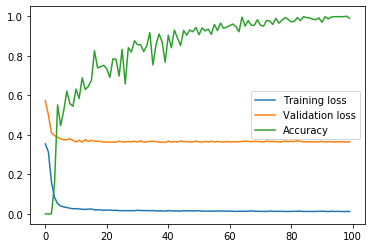

In [52]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.legend()

In [53]:
trainPredict = model.predict(Normal_train_3d)
trainPredict.shape

(459, 1, 4900)

In [54]:
train_preds= trainPredict.reshape(len(trainPredict),maxi,vector_size)
train_preds.shape

(459, 49, 100)

In [55]:
Train_data= Normal_train_3d.reshape(len(trainPredict),maxi,vector_size)
Train_data.shape

(459, 49, 100)

([array([  0., 216., 243.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([  0., 216.,   0., 243.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([  0., 216., 243.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0., 216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         243.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0., 216.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,

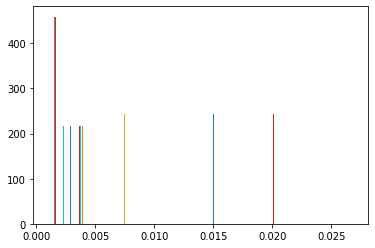

In [56]:
trainMAE = np.mean(np.abs(train_preds - Train_data),axis=2)
plt.hist(trainMAE, bins=30)

In [57]:
trainMAE.shape

(459, 49)

In [58]:
threshold = np.mean(trainMAE) + np.std(trainMAE)
print("Threshold: ", threshold)

Threshold:  0.014969155409780856


In [59]:
testPredict = model.predict(test_data_3d)
testPredict.shape


(200, 1, 4900)

In [60]:
test_preds= testPredict.reshape(len(testPredict),maxi,vector_size)
test_preds.shape

(200, 49, 100)

In [61]:
Test_data=test_data_3d.reshape(len(testPredict),maxi,vector_size)
Test_data.shape

(200, 49, 100)

([array([189.,  11.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([180.,  20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([192.,   8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([200.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([200.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,

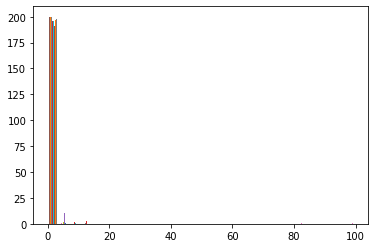

In [62]:
testMAE = np.mean(np.abs(test_preds - Test_data), axis=2)
plt.hist(testMAE, bins=30)

In [63]:
testMAE.shape

(200, 49)

In [64]:
preds= tf.math.less(testMAE,threshold)
preds=np.array(preds)
preds.shape

(200, 49)

In [65]:
import numpy
x = numpy.multiply(preds[0][0], 1)
x

1

In [66]:
array=[]
for i in range(len(preds)):
    multiplier=1
    for j in range(len(preds[i])):
        multiplier= multiplier*preds[i][j]
    array.append(multiplier)

        

In [67]:
array=np.array(array)
array.shape

(200,)

In [68]:
array=array.astype(bool)

In [69]:
test_labels

array([False, False,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True, False,  True, False, False, False,  True,
       False, False, False,  True,  True, False, False,  True, False,
        True, False,  True, False, False,  True,  True, False, False,
       False,  True, False, False, False,  True,  True, False,  True,
       False, False, False, False,  True, False, False, False, False,
        True,  True, False,  True,  True,  True, False,  True, False,
        True, False, False,  True,  True,  True, False,  True,  True,
       False,  True,  True, False, False, False,  True,  True,  True,
       False,  True, False,  True, False,  True,  True, False, False,
       False, False,  True,  True,  True, False,  True, False,  True,
       False,  True,

In [70]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score

accurracy= accuracy_score(test_labels, array)  
fscore= f1_score(test_labels, array, average='micro' ) 
precision= precision_score(test_labels, array, average='micro')                              
recall = recall_score(test_labels, array, average='micro')

In [71]:
accurracy, fscore, precision, recall, elapsed_time

(0.735, 0.735, 0.735, 0.735, 67.97380018234253)